In [1]:
%load_ext autoreload
%autoreload 2

import coder
from coder import formal

# Exploring the `formal` and `tensor` Classes: Constructing the Action of the Co-Derivative on the Generating Series.

In this section, we demonstrate the functionality of the `formal` and `tensor` classes, which serve as the foundation for constructing and analyzing spin chains within the framework of the Co-Derivative approach.

### Objectives

Specifically, we aim to:
- Utilize the `formal` class for symbolic manipulation of mathematical expressions.
- Employ the `tensor` class for representing and operating on multi-dimensional data structures associated with spin chains.

### Key Features

We will showcase the following methods and some of their attributes from the `formal` and `tensor` classes:
- **`formal` and `tensor`:**
  - `__add__`: Support addition of tensors, enabling element-wise operations between compatible objects.
  - `__mul__`: Perform multiplication of formal elements to combine terms.
  - `print_nice`: Render visually appealing representations of formal structures.
  - `sort`: Systematically arrange and simplify terms.
  - `coefs`: Extract coefficients for specified powers in symbolic expressions.

Additionally, we explore:
- Multi-dimensional data representation and manipulation using the `tensor` class.
- Advanced operations such as contraction, multiplication, and slicing.

### Goal

Through this demonstration, we aim to validate the accuracy, flexibility, and integration of the `formal` and `tensor` classes in handling complex mathematical constructs, particularly in the context of the Co-Derivative acting on generating series.



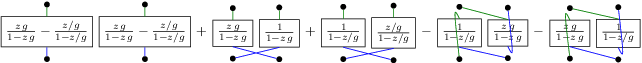

In [2]:
# Taking two Co-Derivatives to act on the generating series.
A = coder.DW(N=2)
A.print_nice()

In [5]:
B = formal.I.tensor(formal.I)+formal.P-formal.Q


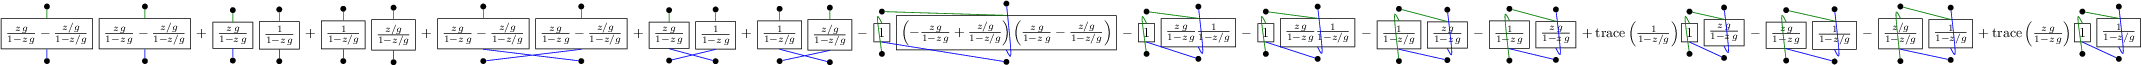

In [6]:
(A*B).sort().print_nice()

0



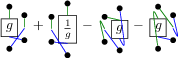


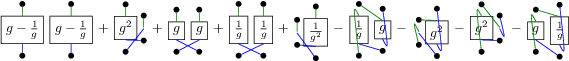

In [133]:
for z in A.coefs(coder.z,2):
    if z==0: print(0)
    else: z.print_nice()

# Computing Arrays with the `to_tensor` Attribute

In Here, we demonstrate the capability of the code to compute and represent multi-dimensional arrays using the `to_tensor` attribute. This functionality is essential for translating abstract mathematical representations into concrete numerical forms.

### Key Feature

- **`to_tensor`:** Converts mathematical constructs into their array representations, enabling numerical computations and visualization of multi-dimensional structures.

### Objective

We will illustrate how the `to_tensor` attribute efficiently generates arrays from symbolic representa


In [2]:
# Taking one Co-Derivatives to act on the generating series.
A = coder.DW(N=1)

In [3]:
A.to_tensor(r=2).array

[[-z*x(2)/(-z*x(2) + 1) + z/((-z/x(2) + 1)*x(2)), 0, 0, 0], [0, -z*x(1)/(-z*x(1) + 1) + z/((-z/x(1) + 1)*x(1)), 0, 0], [0, 0, z*x(1)/(-z*x(1) + 1) - z/((-z/x(1) + 1)*x(1)), 0], [0, 0, 0, z*x(2)/(-z*x(2) + 1) - z/((-z/x(2) + 1)*x(2))]]

# Verify the Yang-Baxter Equation Using the Code

The ability to compute and validate the Yang-Baxter equation is a critical feature of this code, showcasing its application in integrable systems and mathematical physics. This equation plays a central role in quantum integrable models, ensuring consistency and solvability.

### Key Features and Workflow

To demonstrate this capability, we use the following code structure and attributes:

1. **Setup of the Symmetric Tensor Representation:**
   - `SymT`: Constructs the generating series associated with the spin chain symmetry.
   - `copy` and `replace`: Duplicate and modify tensor representations for operations involving the Yang-Baxter relation.

2. **Construction of the R-Matrix:**
   - Symbolic representation of the exchange matrix, capturing the essence of the Yang-Baxter equation.

3. **Verification of the Yang-Baxter Relation:**
   To compute and verify the Yang-Baxter Equation, we use:
    - \( T \): A tensor representation of an operator.
    - \( P \): The permutation operator.
    - \( R \): The \( R \)-matrix, defined using \( u(1), u(2) \), and \( P \).

We compute:
$
\Delta = T \cdot P \cdot R - R \cdot P \cdot T_c
$
If \( \Delta = 0 \), the equation holds, validating the system's integrability.

4. **Conversion to Array Form:**
   - `to_tensor`: Converts the symbolic representation of \(\Delta\) into a computational array for further analysis.
   - `array._sparse_array`: Efficiently stores and manipulates large, sparse representations of multi-dimensional arrays.

In [5]:
T=coder.SymT(N=2,s=3,gl=True)#.print_nice()
Tc=coder.formal.P*T.copy().replace(coder.u,lambda i:coder.u(3-i))*coder.formal.P
ThisR=(coder.u(1)-coder.u(2)+coder.formal.P)
Delta=(T*ThisR-ThisR*Tc)
matrix = Delta.to_tensor(r=3).array._sparse_array

In [6]:
# In the following:
# 1. We list all non-zero entries and systematically verify their values.
# 2. Each entry is checked to confirm it evaluates to zero, ensuring the equation holds.
{key: matrix[key].factor() for key in matrix.keys()}

{0: 0,
 42: 0,
 84: 0,
 126: 0,
 168: 0,
 210: 0,
 217: 0,
 259: 0,
 301: 0,
 343: 0,
 385: 0,
 427: 0,
 434: 0,
 476: 0,
 518: 0,
 560: 0,
 602: 0,
 644: 0,
 651: 0,
 693: 0,
 735: 0,
 777: 0,
 819: 0,
 861: 0,
 868: 0,
 910: 0,
 952: 0,
 994: 0,
 1036: 0,
 1078: 0,
 1085: 0,
 1127: 0,
 1169: 0,
 1211: 0,
 1253: 0,
 1295: 0,
 7: 0,
 14: 0,
 21: 0,
 28: 0,
 35: 0,
 252: 0,
 266: 0,
 273: 0,
 280: 0,
 287: 0,
 504: 0,
 511: 0,
 525: 0,
 532: 0,
 539: 0,
 756: 0,
 763: 0,
 770: 0,
 784: 0,
 791: 0,
 1008: 0,
 1015: 0,
 1022: 0,
 1029: 0,
 1043: 0,
 1260: 0,
 1267: 0,
 1274: 0,
 1281: 0,
 1288: 0}